In [6]:
import pandas as pd
import seaborn as sns
# conda update -n base -c defaults conda

import pandas as pd 
import datetime
import yfinance as yf
import numpy as np

import requests
import apimoex

print(pd.__version__)

2.2.1


In [7]:
with requests.Session() as session:
    data = apimoex.get_board_history(session, 'SNGSP')
    df = pd.DataFrame(data)
    df.set_index('TRADEDATE', inplace=True)
    print(df.head(), '\n')
    print(df.tail(), '\n')
    df.info()

           BOARDID  CLOSE    VOLUME         VALUE
TRADEDATE                                        
2014-06-09    TQBR  27.48  12674200  3.484352e+08
2014-06-10    TQBR  27.55  14035900  3.856417e+08
2014-06-11    TQBR  28.15  27208800  7.602146e+08
2014-06-16    TQBR  28.27  68059900  1.913160e+09
2014-06-17    TQBR  28.20  22101600  6.292844e+08 

           BOARDID  CLOSE    VOLUME         VALUE
TRADEDATE                                        
2024-05-06    TQBR  67.85  26158000  1.781496e+09
2024-05-07    TQBR  68.20  11825800  8.048252e+08
2024-05-08    TQBR  68.30  10444800  7.129610e+08
2024-05-10    TQBR  69.02  13974400  9.603177e+08
2024-05-13    TQBR  70.49  77698200  5.428267e+09 

<class 'pandas.core.frame.DataFrame'>
Index: 2506 entries, 2014-06-09 to 2024-05-13
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BOARDID  2506 non-null   object 
 1   CLOSE    2488 non-null   float64
 2   VOLUME   2506 non-null 

In [8]:
with requests.Session() as session:
    data = apimoex.get_board_candle_borders(session, 'SBER')
    df = pd.DataFrame(data)
    print(df)

                 begin                  end  interval
0  2011-12-15 10:00:00  2024-05-14 22:59:59         1
1  2007-07-01 00:00:00  2024-05-14 00:00:00         4
2  2007-07-16 00:00:00  2024-05-14 00:00:00         7
3  2011-12-08 10:00:00  2024-05-14 22:05:15        10
4  2007-07-20 00:00:00  2024-05-14 22:05:16        24
5  2007-07-01 00:00:00  2024-05-14 00:00:00        31
6  2011-11-17 10:00:00  2024-05-14 22:05:15        60


In [9]:
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)
with requests.Session() as session:
    data = apimoex.get_market_candles(session, 'SBER', interval=60, start= start, end=end)
    df = pd.DataFrame(data)
    print(df.head(), '\n')
    df.set_index(pd.to_datetime(df['begin']), inplace=True)
    df.drop(['begin'], axis=1, inplace=True)
    print(df.head(), '\n')
    print(df.tail(), '\n')
    df.info()

                 begin    open   close    high     low         value   volume
0  2022-01-03 06:00:00  295.90  295.90  295.90  295.90  7.962669e+06    26910
1  2022-01-03 07:00:00  295.90  295.10  296.10  294.34  3.108796e+08  1053730
2  2022-01-03 08:00:00  295.09  296.55  296.80  294.90  3.793610e+08  1282050
3  2022-01-03 09:00:00  296.55  296.60  296.95  295.86  3.449864e+08  1164060
4  2022-01-03 10:00:00  296.57  300.25  301.20  296.45  2.852590e+09  9537250 

                       open   close    high     low         value   volume
begin                                                                     
2022-01-03 06:00:00  295.90  295.90  295.90  295.90  7.962669e+06    26910
2022-01-03 07:00:00  295.90  295.10  296.10  294.34  3.108796e+08  1053730
2022-01-03 08:00:00  295.09  296.55  296.80  294.90  3.793610e+08  1282050
2022-01-03 09:00:00  296.55  296.60  296.95  295.86  3.449864e+08  1164060
2022-01-03 10:00:00  296.57  300.25  301.20  296.45  2.852590e+09  9537250 

   

In [10]:
sbr = df
sbr.head(20)

,open,close,high,low,value,volume
begin,,,,,,
2022-01-03 06:00:00,295.90,295.90,295.90,295.90,7.962669e+06,26910
2022-01-03 07:00:00,295.90,295.10,296.10,294.34,3.108796e+08,1053730
2022-01-03 08:00:00,295.09,296.55,296.80,294.90,3.793610e+08,1282050
2022-01-03 09:00:00,296.55,296.60,296.95,295.86,3.449864e+08,1164060
2022-01-03 10:00:00,296.57,300.25,301.20,296.45,2.852590e+09,9537250
2022-01-03 11:00:00,300.20,301.05,303.43,299.11,2.794200e+09,9255030
2022-01-03 12:00:00,301.05,301.00,301.40,300.30,8.836552e+08,2936640
2022-01-03 13:00:00,300.98,302.20,302.39,300.36,1.275980e+09,4234560
2022-01-03 14:00:00,302.14,301.27,302.34,300.05,9.421283e+08,3125010


In [11]:
sbr.index

DatetimeIndex(['2022-01-03 06:00:00', '2022-01-03 07:00:00',
               '2022-01-03 08:00:00', '2022-01-03 09:00:00',
               '2022-01-03 10:00:00', '2022-01-03 11:00:00',
               '2022-01-03 12:00:00', '2022-01-03 13:00:00',
               '2022-01-03 14:00:00', '2022-01-03 15:00:00',
               ...
               '2022-12-30 14:00:00', '2022-12-30 15:00:00',
               '2022-12-30 16:00:00', '2022-12-30 17:00:00',
               '2022-12-30 18:00:00', '2022-12-30 19:00:00',
               '2022-12-30 20:00:00', '2022-12-30 21:00:00',
               '2022-12-30 22:00:00', '2022-12-30 23:00:00'],
              dtype='datetime64[ns]', name='begin', length=3010, freq=None)

In [12]:
sbr_vol_month=sbr.resample('ME').sum()
sbr_vol_month

,open,close,high,low,value,volume
begin,,,,,,
2022-01-31,96214.98,96187.01,96766.60,95592.94,1.078002e+12,4242270550
2022-02-28,78524.37,78417.54,79256.07,77704.26,1.319073e+12,6067441240
2022-03-31,4712.35,4716.14,4802.58,4643.95,6.551515e+10,476778920
2022-04-30,28068.03,28046.33,28313.67,27798.59,2.167699e+11,1593570460
2022-05-31,22139.64,22124.62,22248.73,22023.03,8.752642e+10,709098740
2022-06-30,26411.98,26417.55,26541.01,26291.00,1.370268e+11,1070107420
2022-07-31,27250.66,27255.36,27384.73,27114.69,1.220530e+11,941131560
2022-08-31,29245.99,29241.37,29340.41,29142.53,1.171590e+11,915496140
2022-09-30,37761.85,37753.95,37968.75,37540.86,2.440899e+11,1922677330


In [13]:
open_m=sbr.open.resample('ME').first().values
open_m

array([295.9 , 269.72, 131.  , 145.  , 129.1 , 117.5 , 124.13, 131.77,
       133.99, 110.62, 127.2 , 137.1 ])

In [14]:
close_m=sbr.close.resample('ME').last().values
low_m=sbr.low.resample('ME').min().values
high_m=sbr.high.resample('ME').max().values

In [15]:
month=sbr.index.strftime('%b').unique()
month

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='begin')

In [16]:
moth_a=pd.DataFrame(
    {'month':month,'open':open_m,'close':close_m,'low':low_m,'high':high_m},
    index=sbr_vol_month.index)
moth_a.head(3)

,month,open,close,low,high
begin,,,,,
2022-01-31,Jan,295.90,269.42,221.03,310.1
2022-02-28,Feb,269.72,131.12,89.59,282.3
2022-03-31,Mar,131.00,143.69,122.00,156.2


In [17]:
sb_m=sbr.resample('ME').agg({'open':'first','low':'min','high':'max','close':'last'})
sb_m

,open,low,high,close
begin,,,,
2022-01-31,295.90,221.03,310.10,269.42
2022-02-28,269.72,89.59,282.30,131.12
2022-03-31,131.00,122.00,156.20,143.69
2022-04-30,145.00,111.50,169.90,128.80
2022-05-31,129.10,117.10,131.50,118.30
2022-06-30,117.50,115.80,142.35,125.20
2022-07-31,124.13,122.24,137.10,131.90
2022-08-31,131.77,122.24,138.34,134.25
2022-09-30,133.99,103.40,145.10,110.21


In [18]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

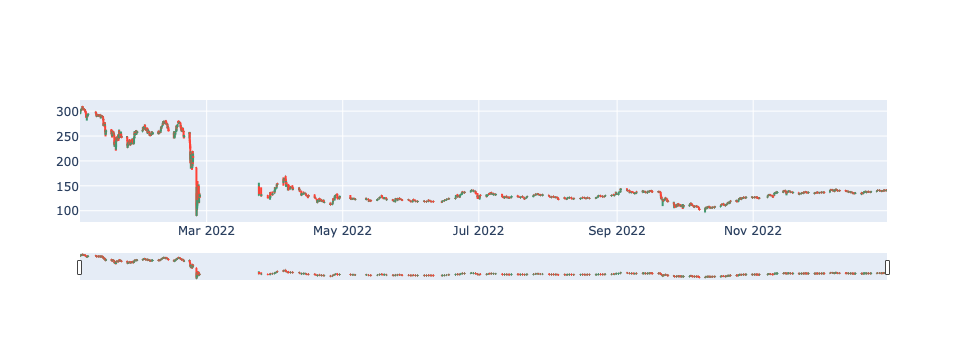

In [19]:
trace = go.Ohlc(x=sbr.index,
                open=sbr['open'],
                high=sbr['high'],
                low=sbr['low'],
                close=sbr['close'])

data = [trace]
iplot(data)

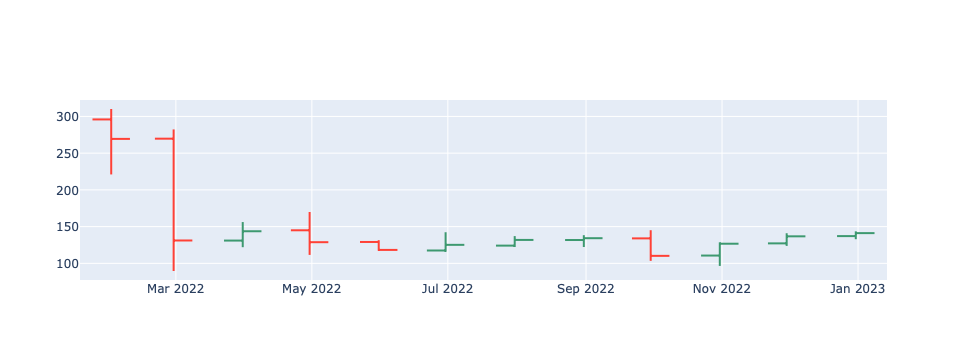

In [20]:
trace2 = go.Ohlc(x=sb_m.index,# Проблема месяц, есть ли решение на середину месяца
                open=sb_m['open'],
                high=sb_m['high'],
                low=sb_m['low'],
                close=sb_m['close'])

# убрать бегунок снизу
layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data2 = [trace2]
fig = go.Figure(data=data2,layout=layout)
iplot(fig)

In [21]:
sb_m=sbr.resample('ME').agg({'open':'first','low':'min','high':'max','close':'last'})
sb_m

,open,low,high,close
begin,,,,
2022-01-31,295.90,221.03,310.10,269.42
2022-02-28,269.72,89.59,282.30,131.12
2022-03-31,131.00,122.00,156.20,143.69
2022-04-30,145.00,111.50,169.90,128.80
2022-05-31,129.10,117.10,131.50,118.30
2022-06-30,117.50,115.80,142.35,125.20
2022-07-31,124.13,122.24,137.10,131.90
2022-08-31,131.77,122.24,138.34,134.25
2022-09-30,133.99,103.40,145.10,110.21


In [22]:
sb_m=sbr.resample('MS').agg({'open':'first','low':'min','high':'max','close':'last'})
sb_m

,open,low,high,close
begin,,,,
2022-01-01,295.90,221.03,310.10,269.42
2022-02-01,269.72,89.59,282.30,131.12
2022-03-01,131.00,122.00,156.20,143.69
2022-04-01,145.00,111.50,169.90,128.80
2022-05-01,129.10,117.10,131.50,118.30
2022-06-01,117.50,115.80,142.35,125.20
2022-07-01,124.13,122.24,137.10,131.90
2022-08-01,131.77,122.24,138.34,134.25
2022-09-01,133.99,103.40,145.10,110.21


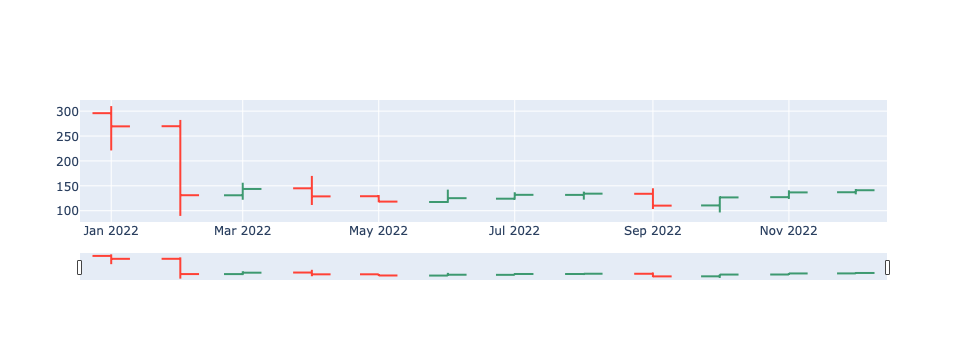

In [23]:
trace2 = go.Ohlc(x=sb_m.index,# Проблема месяц, есть ли решение на середину месяца
                open=sb_m['open'],
                high=sb_m['high'],
                low=sb_m['low'],
                close=sb_m['close'])


# layout = go.Layout(
#     xaxis = dict(
#         rangeslider = dict(
#             visible = False
#         )
#     )
# )

data2 = [trace2]
fig = go.Figure(data=data2)#,layout=layout)
iplot(fig)

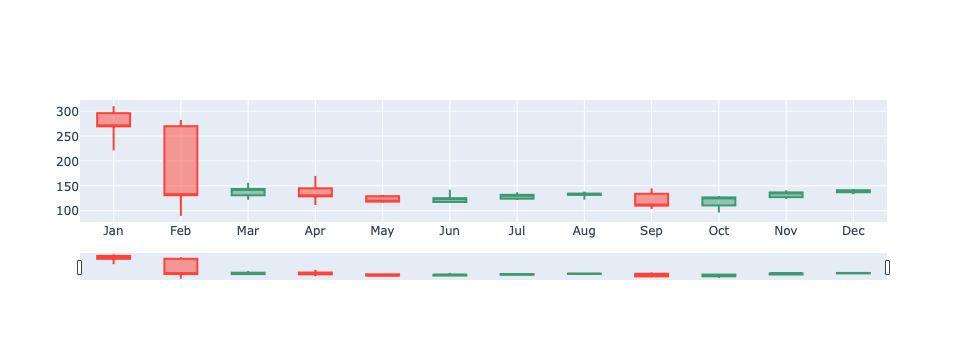

In [24]:
month=sbr.index.strftime('%b').unique()

trace2 = go.Candlestick(
                x=month, # Внимание на месяц
                open=sb_m['open'],
                high=sb_m['high'],
                low=sb_m['low'],
                close=sb_m['close'])

# layout = go.Layout(
#     xaxis = dict(
#         rangeslider = dict(
#             visible = False
#         )
#     )
# )

data2 = [trace2]
fig = go.Figure(data=data2)#,layout=layout)
iplot(fig)

In [25]:
sbr.low.resample('ME').min()

begin
2022-01-31    221.03
2022-02-28     89.59
2022-03-31    122.00
2022-04-30    111.50
2022-05-31    117.10
2022-06-30    115.80
2022-07-31    122.24
2022-08-31    122.24
2022-09-30    103.40
2022-10-31     96.50
2022-11-30    123.75
2022-12-31    132.86
Freq: ME, Name: low, dtype: float64

In [26]:
sbr

,open,close,high,low,value,volume
begin,,,,,,
2022-01-03 06:00:00,295.90,295.90,295.90,295.90,7.962669e+06,26910
2022-01-03 07:00:00,295.90,295.10,296.10,294.34,3.108796e+08,1053730
2022-01-03 08:00:00,295.09,296.55,296.80,294.90,3.793610e+08,1282050
2022-01-03 09:00:00,296.55,296.60,296.95,295.86,3.449864e+08,1164060
2022-01-03 10:00:00,296.57,300.25,301.20,296.45,2.852590e+09,9537250
...,...,...,...,...,...,...
2022-12-30 19:00:00,141.21,141.38,141.40,141.12,1.004312e+08,710560
2022-12-30 20:00:00,141.39,141.08,141.41,141.03,1.040145e+08,736150
2022-12-30 21:00:00,141.10,140.80,141.20,140.77,1.361977e+08,966110


In [27]:
#pip install finplot
# падает 
# import finplot as fplt

In [28]:

# ax1,ax2,ax3,ax4 = fplt.create_plot('sber analysis', rows=4, maximize=False)
# fplt.set_y_scale(ax=ax1, yscale='log')

# fplt.plot(sbr.close, color='#000', legend='Log price', ax=ax1)
# sbr['ma90'] = sbr.close.rolling(90).mean()
# sbr['ma30'] = sbr.close.rolling(30).mean()
# fplt.plot(sbr.ma90, legend='MA90', ax=ax1)
# fplt.plot(sbr.ma30, legend='MA30', ax=ax1)
# sbr['one'] = 1
# fplt.volume_ocv(sbr[['ma90','ma30','one']], candle_width=1, ax=ax1.overlay(scale=0.02))

# daily_ret = sbr.close.pct_change()*100
# fplt.plot(daily_ret, width=3, color='#000', legend='Daily returns %', ax=ax2)

# fplt.add_legend('Daily % returns histogram', ax=ax3)
# fplt.hist(daily_ret, bins=60, ax=ax3)

# fplt.add_legend('Yearly returns in %', ax=ax4)
# fplt.bar(sbr.close.resample('ME').last().pct_change().dropna()*100, ax=ax4)

# fplt.show()

In [29]:
# # pip install --upgrade mplfinance
# import mplfinance as mpf

# sbr_mpf = sbr.copy()
# sbr_mpf['ma90'] = sbr.close.rolling(90).mean()
# sbr_mpf['ma30'] = sbr.close.rolling(30).mean()
# sbr_mpf['one'] = 1
# sbr_mpf.columns = ['open', 'low', 'high', 'close', 'value', 'ma90', 'ma30', 'one'] 

# mpf.plot(sbr_mpf, type='candle',mav=(30,90), volume=False,show_nontrading=True, )

In [30]:
sbr_mpf = sbr.copy()
sbr_mpf.columns

Index(['open', 'close', 'high', 'low', 'value', 'volume'], dtype='object')

In [31]:
sbr_mpf

,open,close,high,low,value,volume
begin,,,,,,
2022-01-03 06:00:00,295.90,295.90,295.90,295.90,7.962669e+06,26910
2022-01-03 07:00:00,295.90,295.10,296.10,294.34,3.108796e+08,1053730
2022-01-03 08:00:00,295.09,296.55,296.80,294.90,3.793610e+08,1282050
2022-01-03 09:00:00,296.55,296.60,296.95,295.86,3.449864e+08,1164060
2022-01-03 10:00:00,296.57,300.25,301.20,296.45,2.852590e+09,9537250
...,...,...,...,...,...,...
2022-12-30 19:00:00,141.21,141.38,141.40,141.12,1.004312e+08,710560
2022-12-30 20:00:00,141.39,141.08,141.41,141.03,1.040145e+08,736150
2022-12-30 21:00:00,141.10,140.80,141.20,140.77,1.361977e+08,966110


In [32]:
# Bokeh
# https://www.youtube.com/watch?v=_8eU8BiueQM
# https://www.youtube.com/watch?v=OJNxE1FjtXU
